# Importa os modulos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Carrega os dados

In [3]:
test=pd.read_csv('test.csv')
traind=pd.read_csv('train.csv')

# visualização 

In [4]:
test.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
traind.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
# Verificamos os tipos de dados
traind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Com isso podemos saber quais nossas variáveis e quais seus tipos.

# Resumo estatísco

In [7]:
traind.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
# Variável das categorias 
traind.describe(include=['O'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


# Exploratory Data Analysis (EDA)

Começaremos a nossa análise verificando a distribuição da nossa variável alvo (Purchase).

C:\Users\wesley vieira\AppData\Local\Temp\ipykernel_5368\1533136464.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traind.Purchase, bins = 25)


Text(0.5, 1.0, 'Valores distribuidos')

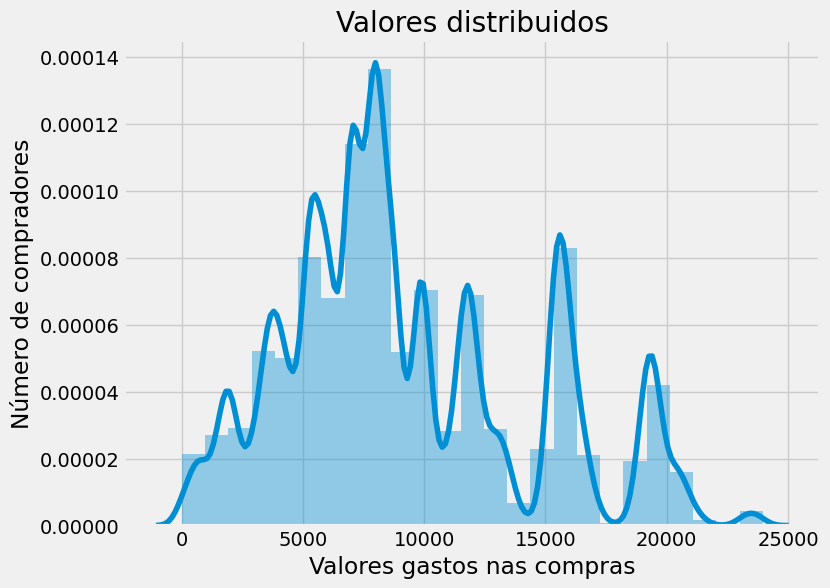

In [9]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
sns.distplot(traind.Purchase, bins = 25)
plt.xlabel('Valores gastos nas compras')
plt.ylabel('Número de compradores')
plt.title('Valores distribuidos')


Com isso conseguimos ver que existe uma concentração entre os valores de 5 á 10 mil dólares.

<Axes: >

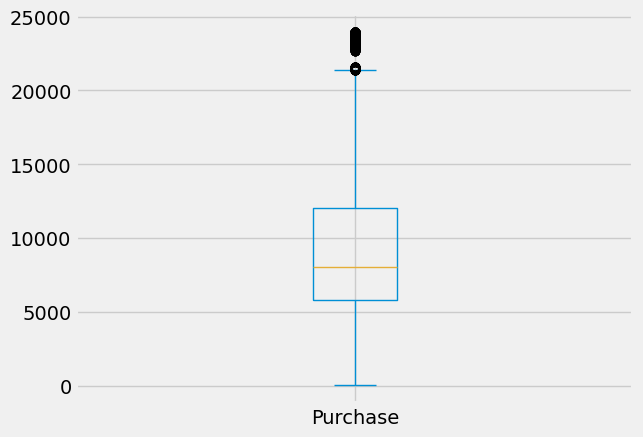

In [10]:
traind['Purchase'].plot.box()

Com isso podemos ver que existe valores fora da normalidade acima de 20 mil dólares.

# Quem possuem o maior volume de compra homem ou mulheres?

In [11]:
traind['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

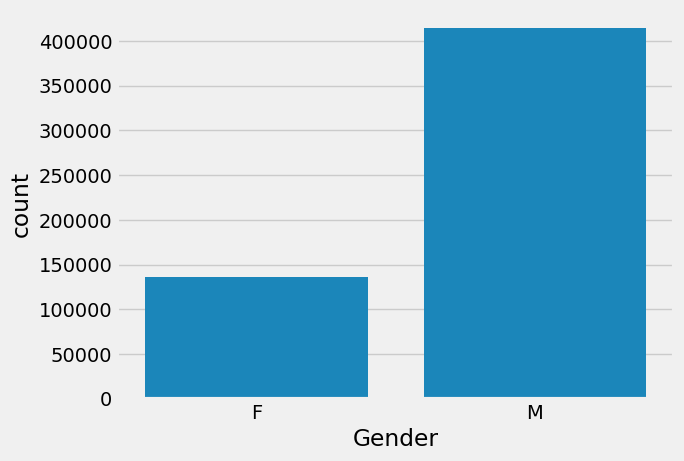

In [12]:
# sns.countplot(traind.Gender)
sns.countplot(x='Gender', data=traind)

# Média de compra para cada sexo?

In [13]:
traind.groupby(['Gender'])['Purchase'].mean().sort_values(ascending=False)

Gender
M    9437.526040
F    8734.565765
Name: Purchase, dtype: float64

<Axes: xlabel='Gender', ylabel='Purchase'>

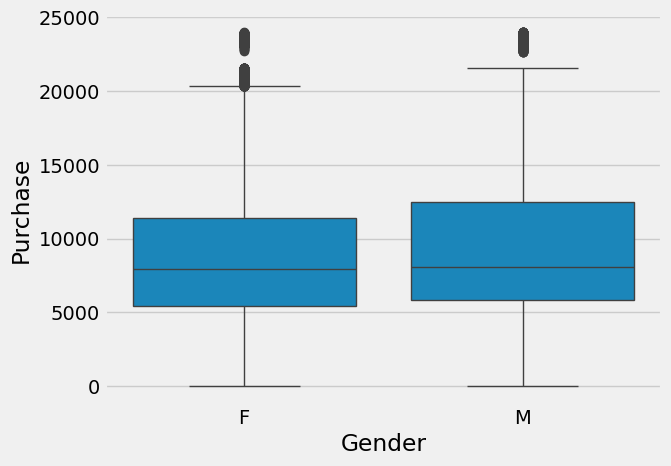

In [14]:
sns.boxplot(x='Gender',y='Purchase',data=traind)

Aqui vemos que tem um volume bem maior de usuário masculino e o valor de venda tende a ser um pouco maior também.

# Qual a idade relevante entre os usuários?

In [15]:
traind['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='count'>

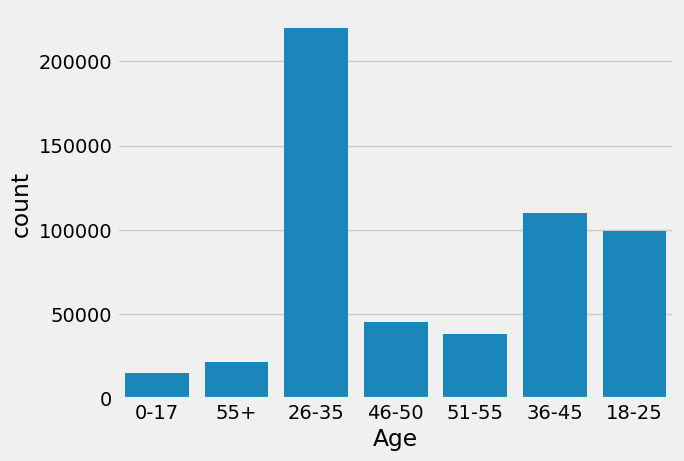

In [16]:
sns.countplot(x='Age', data=traind)

Com isso observamos que a faixa etária dos usuários se concentra entre 26 a 35 anos.

In [17]:
traind.groupby('Gender')['Age'].value_counts()

Gender  Age  
F       26-35     50752
        36-45     27170
        18-25     24628
        46-50     13199
        51-55      9894
        0-17       5083
        55+        5083
M       26-35    168835
        36-45     82843
        18-25     75032
        46-50     32502
        51-55     28607
        55+       16421
        0-17      10019
Name: count, dtype: int64

Com isso podemos dizer que temos mais homens na faixa de  26-35 anos do que mulhreres.

# Valor médio de coompra para cada sexo

In [18]:
traind[['Age','Purchase']].groupby(['Age']).mean().sort_values(by='Purchase',ascending=False)

,Purchase
Age,
51-55,9534.808031
55+,9336.280459
36-45,9331.350695
26-35,9252.690633
46-50,9208.625697
18-25,9169.663606
0-17,8933.464640


<Axes: xlabel='Age', ylabel='Purchase'>

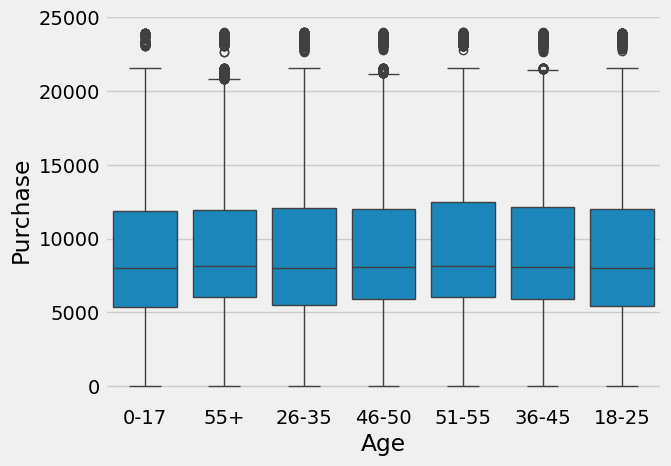

In [19]:
sns.boxplot(x='Age',y='Purchase', data=traind)

O valor médio de venda esta bem esquilibrado,sendo o menor valor na faixa de 0 a 17 anos

# Vamos observar o número de consumidores por ocupação.

In [20]:
traind['Occupation'].value_counts()

Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64

<Axes: xlabel='Occupation', ylabel='count'>

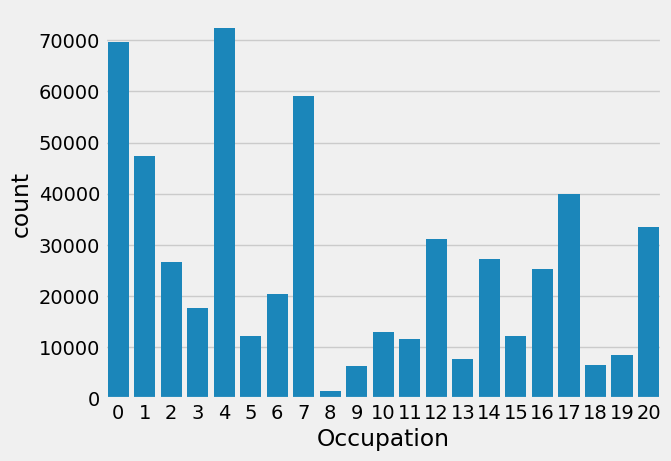

In [21]:
sns.countplot(x='Occupation',data=traind)

In [22]:
traind[['Occupation','Purchase']].groupby(['Occupation']).mean().sort_values(by='Purchase',ascending=False)

,Purchase
Occupation,
17,9821.478236
12,9796.640239
15,9778.891163
8,9532.592497
14,9500.702772
7,9425.728223
16,9394.464349
5,9333.149298
13,9306.351061


<Axes: xlabel='Occupation', ylabel='Purchase'>

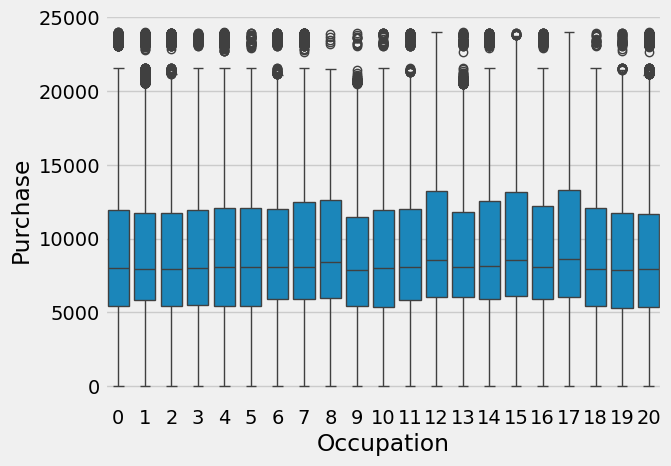

In [23]:
sns.boxplot(x='Occupation',y='Purchase',data=traind)

# Qual categoria é a cidade com maior número de usuário?

In [24]:
traind['City_Category'].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

<Axes: xlabel='City_Category', ylabel='count'>

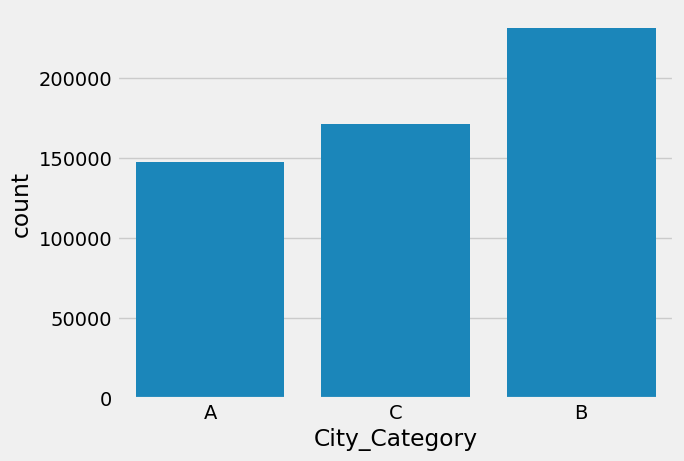

In [25]:
sns.countplot(x='City_Category', data=traind)

# Média de compar por cidade?

In [26]:
traind[['City_Category','Purchase']].groupby(['City_Category']).mean().sort_values(by='Purchase',ascending=False)

,Purchase
City_Category,
C,9719.920993
B,9151.300563
A,8911.939216


<Axes: xlabel='Purchase', ylabel='City_Category'>

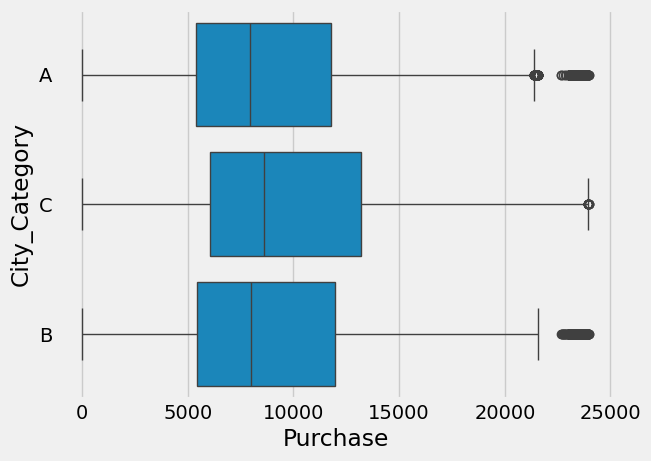

In [27]:
sns.boxplot(y='City_Category',x='Purchase', data=traind)

O maior número de usuários pertence a cidade de categoria B já a categoria c tem o maior valor médio de compra

# A quantos anos o usuário mor na cidade atual?


In [28]:
traind['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

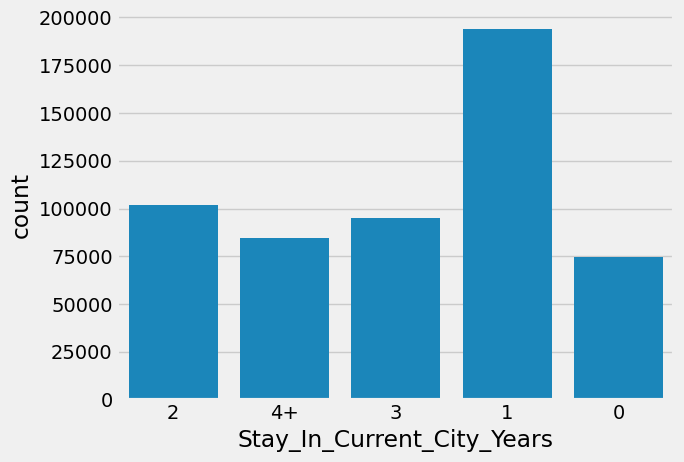

In [29]:
sns.countplot(x='Stay_In_Current_City_Years', data=traind)

# Valor médio de compra de acordo com número de anos que o usuário mora na cidade.

In [30]:
traind[['Stay_In_Current_City_Years','Purchase']].groupby(['Stay_In_Current_City_Years']).mean().sort_values(by='Purchase',ascending=False)

,Purchase
Stay_In_Current_City_Years,
2,9320.429810
3,9286.904119
4+,9275.598872
1,9250.145923
0,9180.075123


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

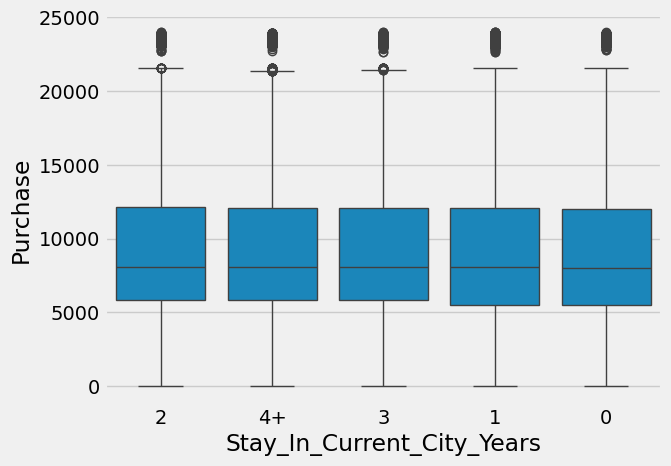

In [31]:
sns.boxplot(x='Stay_In_Current_City_Years', y='Purchase', data=traind)

 grande maioria moram há 1 ano na cidade atual.

# Agora queremos saber o estado civil dos consumidores.

In [32]:
traind['Marital_Status'].value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

In [36]:
traind['Marital_Status']=traind['Marital_Status'].apply(str)

<Axes: xlabel='Marital_Status', ylabel='count'>

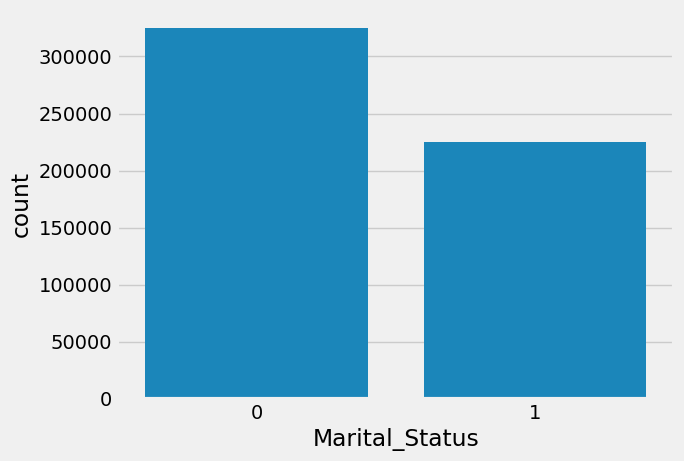

In [41]:
sns.countplot(x='Marital_Status',data=traind)

In [42]:
traind[['Marital_Status','Purchase']].groupby(['Marital_Status']).mean().sort_values(by='Purchase',ascending=False)

,Purchase
Marital_Status,
0,9265.907619
1,9261.174574


# Valor médio de comprar por estado civil?

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

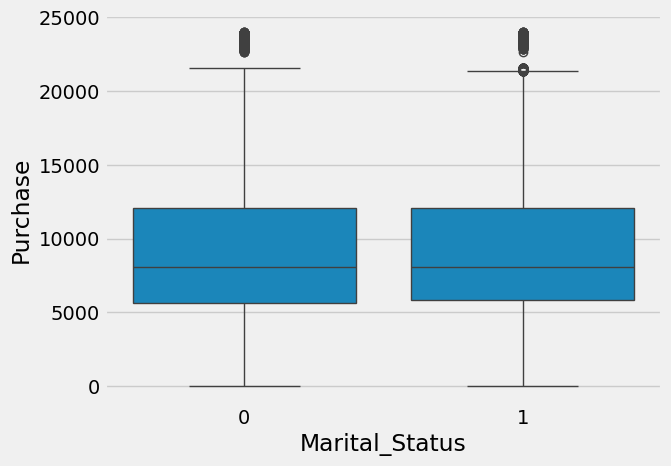

In [43]:
sns.boxplot(x='Marital_Status', y='Purchase', data=traind)

Por default 0 = False e 1 = True, ou seja 0 não é casado e 1 é casado. Dito isso fica claro que os usuários em sua maioria não são casados.

# Vamos analisar algumas a categoria dos produtos.

In [44]:
traind['Product_Category_1'].value_counts()

Product_Category_1
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

In [49]:
traind[['Product_Category_1','Purchase']].groupby(['Product_Category_1']).mean().sort_values(by='Purchase',ascending=False)

,Purchase
Product_Category_1,
10,19675.570927
7,16365.689600
6,15838.478550
9,15537.375610
15,14780.451828
16,14766.037037
1,13606.218596
14,13141.625739
2,11251.935384


<Axes: >

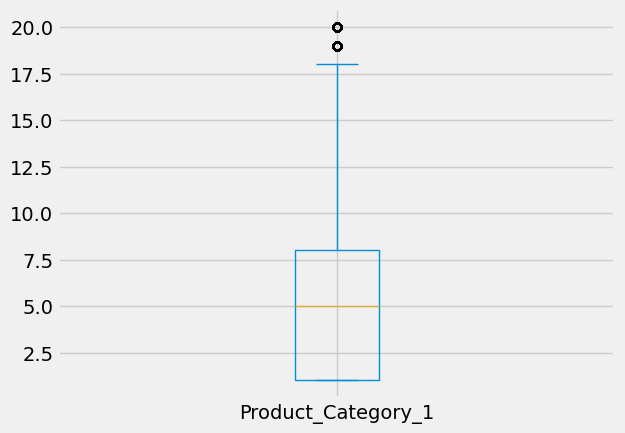

In [47]:
traind['Product_Category_1'].plot.box()

Os produtos da categoria 1 que pertencem ao grupo 19 e 20 são outliers

In [48]:
traind['Product_Category_2'].value_counts()

Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

In [51]:
traind[['Product_Category_2','Purchase']].groupby(['Product_Category_2']).mean().sort_values(by='Purchase',ascending=False)

,Purchase
Product_Category_2,
10.0,15648.729543
2.0,13619.356401
6.0,11503.551379
3.0,11235.359570
15.0,10357.077691
16.0,10295.681933
8.0,10273.259518
4.0,10215.192001
13.0,9683.352388


<Axes: >

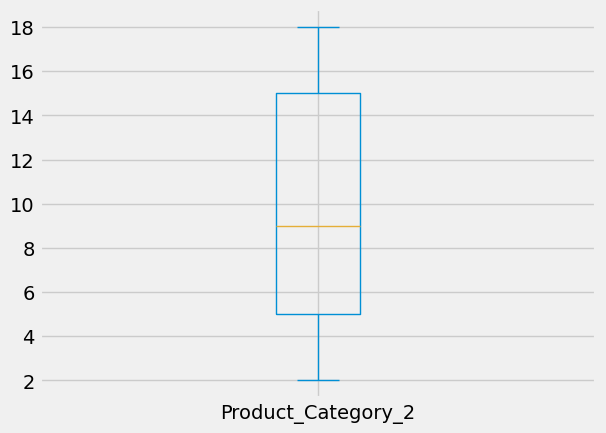

In [53]:
traind['Product_Category_2'].plot.box()

Já na categoria 2, temos uma maior quantidade de produtos do grupo 8. Podemos observar também que o produto do grupo 10 teve o maior valor médio de compra.

In [54]:
traind['Product_Category_3'].value_counts()

Product_Category_3
16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: count, dtype: int64

In [56]:
traind[['Product_Category_3','Purchase']].groupby(['Product_Category_3']).mean().sort_values(by='Purchase',ascending=False)

,Purchase
Product_Category_3,
3.0,13939.696574
10.0,13505.813441
6.0,13194.311043
13.0,13185.118703
8.0,13024.918882
15.0,12339.369900
5.0,12117.786889
11.0,12091.437673
16.0,11981.890642


<Axes: >

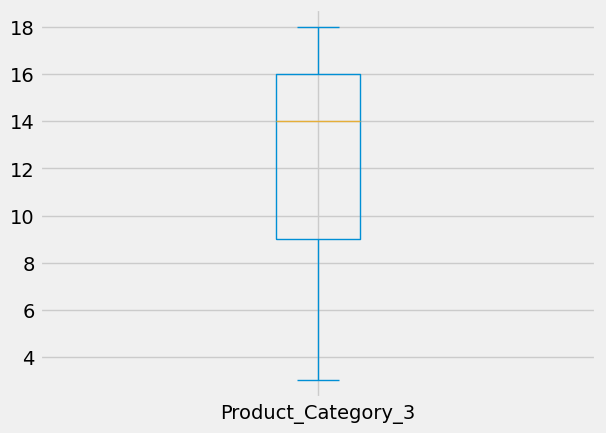

In [57]:
traind['Product_Category_3'].plot.box()

Na categoria 3 temos o produto do grupo 3 com a menor quantidade. Dando uma verificada mais detalhada, chegamos a uma informação importante, na categoria 2 e 3 temos um valor médio de compra bem próximo para os produtos do grupo 10.

# vamos verificar graficamente as informações citadas acima.

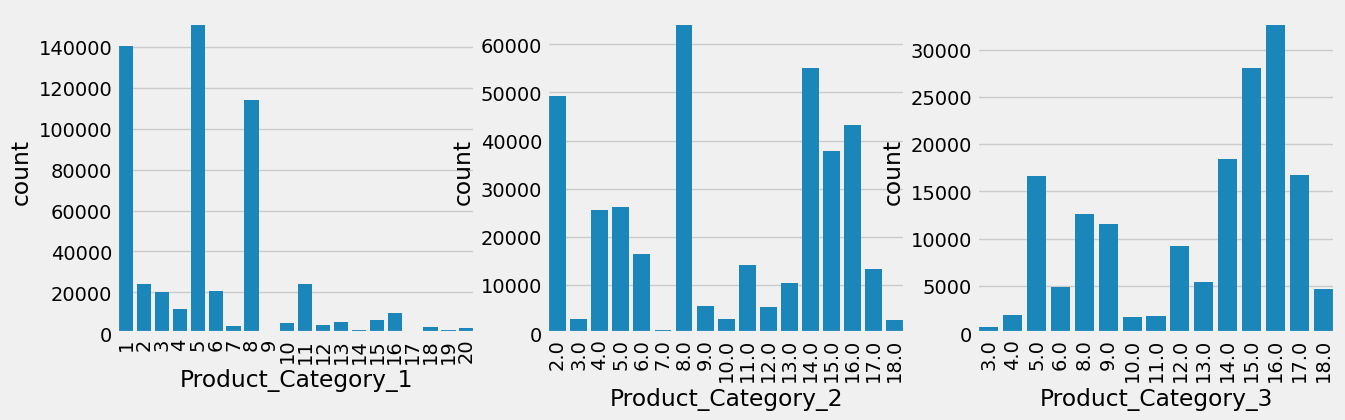

In [58]:
plt.figure(figsize=(14,4))
plt.subplot(131)
sns.countplot(x='Product_Category_1',data=traind)
plt.xticks(rotation=90)

plt.subplot(132)
sns.countplot(x='Product_Category_2',data=traind)
plt.xticks(rotation=90)

plt.subplot(133)
sns.countplot(x='Product_Category_3',data=traind)
plt.xticks(rotation=90)


plt.show()